# Voltage Profile Static View Example

This notebook demonstrates how to use the `py_dss_tools` package to visualize the static version of the voltage profile of a distribution feeder. The example covers compiling a DSS model, solving a snapshot simulation, and generating various voltage profile plots.


In [11]:
import py_dss_interface
from py_dss_tools import dss_tools

Define the path to the DSS file

In [12]:
dss_file = r"C:\PauloRadatz\GitHub\py_dss_tools\examples\feeders\123Bus\IEEE123Master.dss"

Create an instance of DSS

In [13]:
dss = py_dss_interface.DSS()

Connect DSS instance to the dss_tools

In [14]:
dss_tools.update_dss(dss)

Compile the DSS model from the specified file, load bus coordinates for visualization

In [15]:
dss.text(f"compile [{dss_file}]")
dss.text(f"buscoords buscoords.dat")

''

Add EnergyMeter and Solve Snapshot. An energymeter is added at the feeder head, and a snapshot simulation is solved to prepare for plotting the voltage profile.

In [16]:
dss_tools.model.add_line_in_vsource(add_meter=True)
dss_tools.simulation.solve_snapshot()

### Plot Voltage Profile with Default Parameters

The voltage profile of the feeder is plotted using the default parameters.

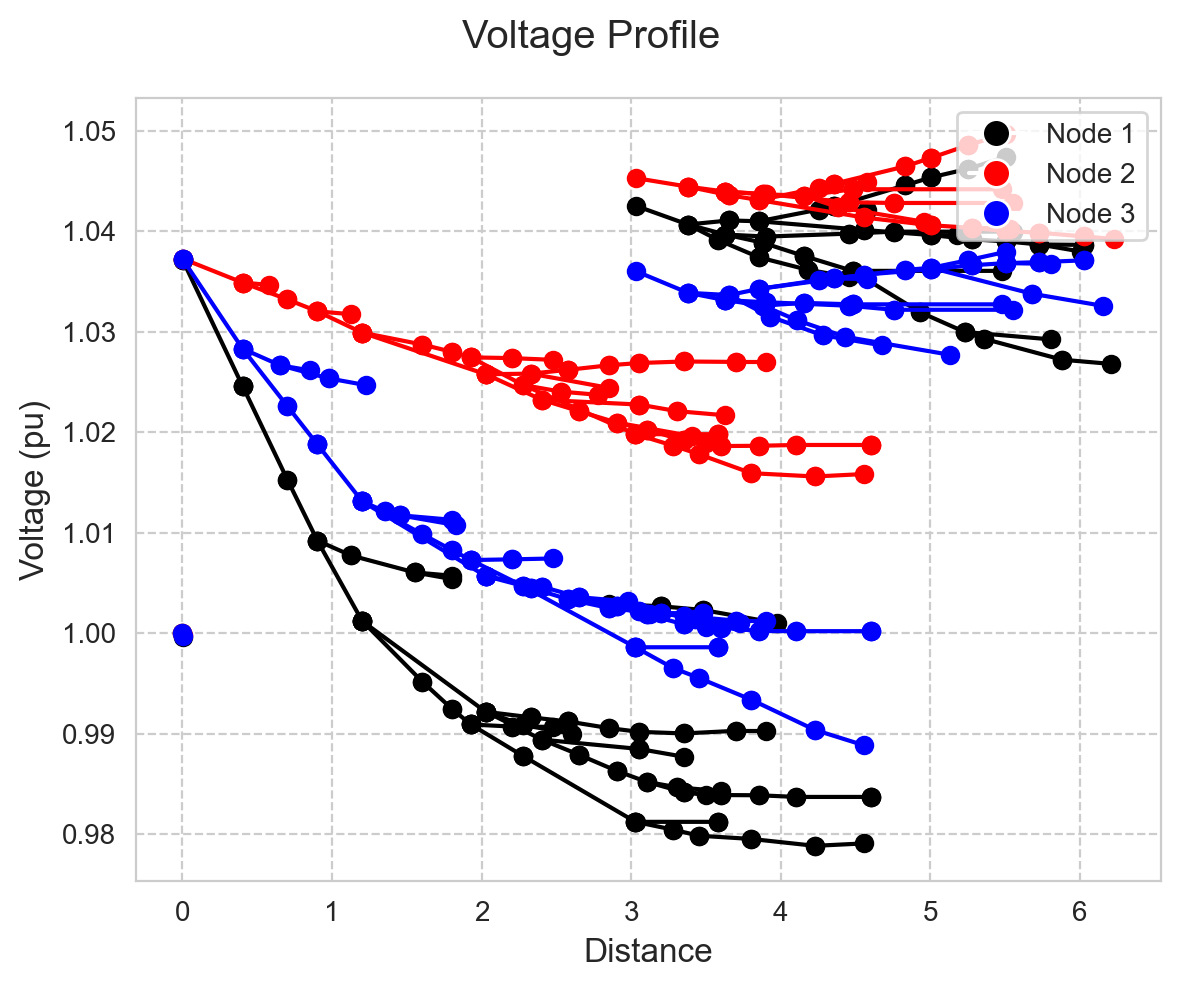

In [17]:
dss_tools.static_view.voltage_profile()

### Plot Voltage Profile with Custom Title

We can customize the voltage profile plot by providing argument values to the `voltage_profile` method.

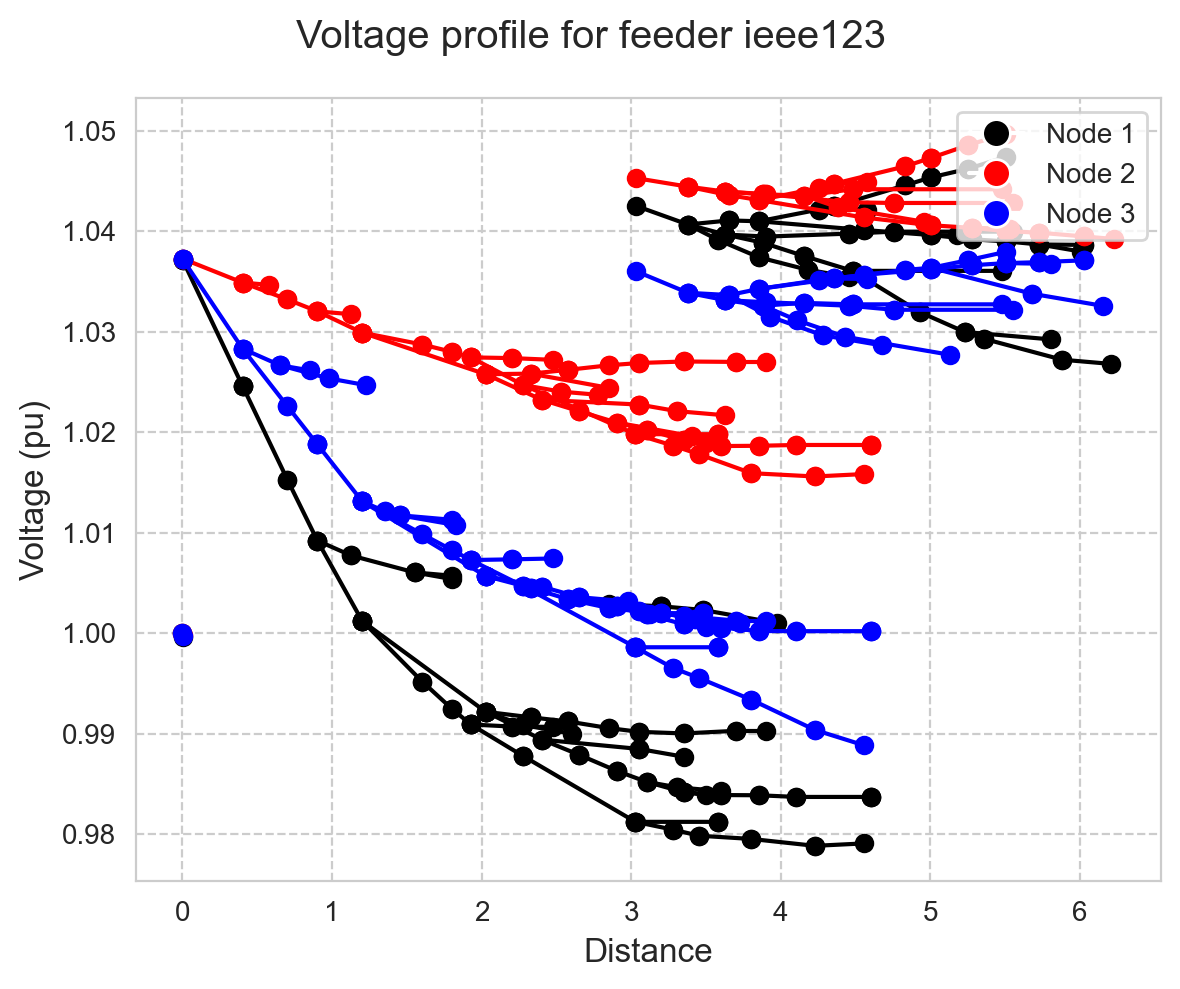

In [18]:
dss_tools.static_view.voltage_profile(title=f"Voltage profile for feeder {dss.circuit.name}")

### Customize Matplotlib Attributes for Voltage Profile Plot

We can modify Matplotlib attributes, such as grid visibility, for the voltage profile plot.

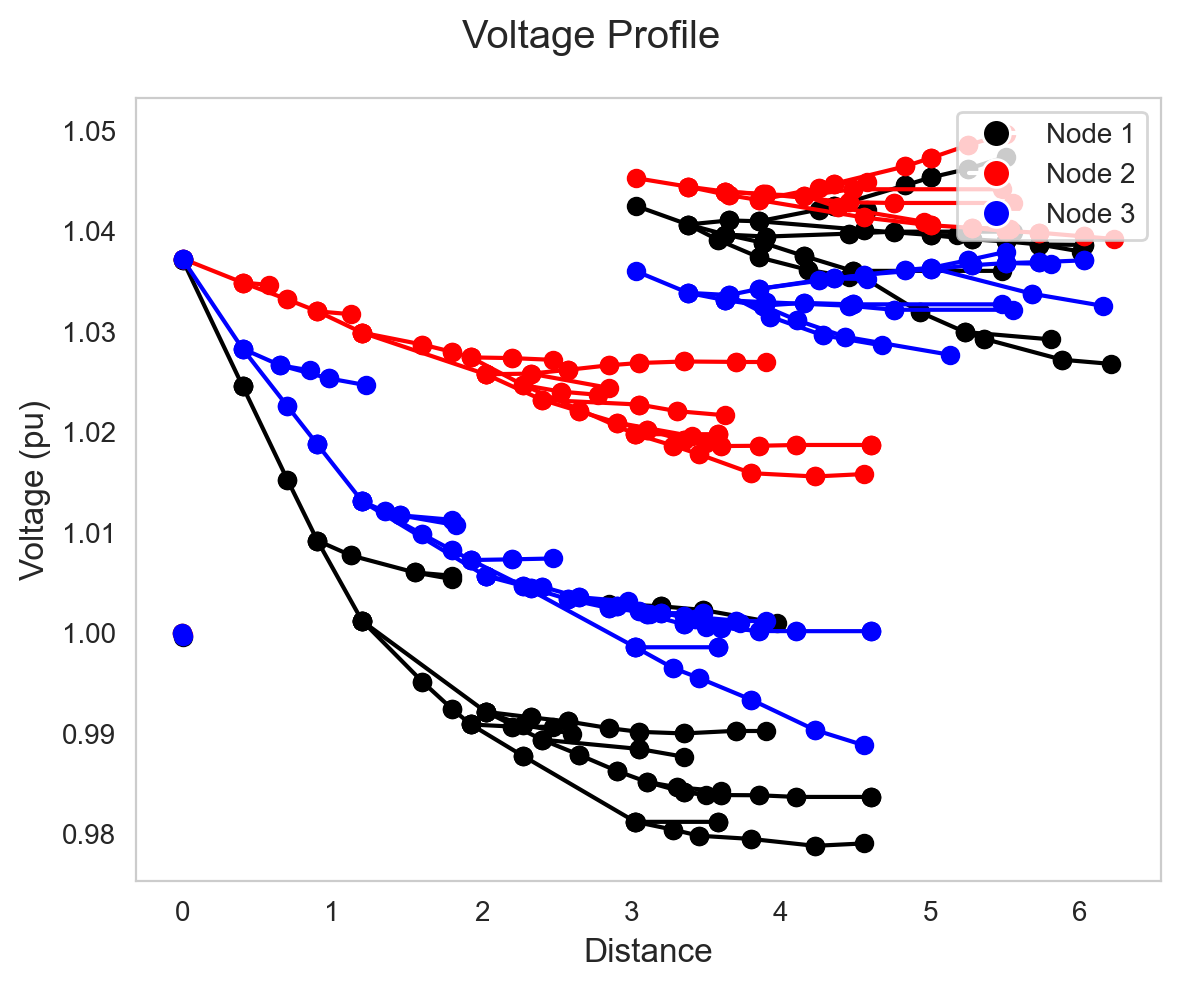

In [19]:
dss_tools.static_view.voltage_profile_plot_style.axes_grid = False
dss_tools.static_view.voltage_profile()

### Mark Specific Buses in the Voltage Profile

We can annotate specific buses in the voltage profile by marking them with custom labels. We should pass a list of `dss_tools.static_view.voltage_profile_get_bus_mark` objects to the `buses_marker` argument of the `voltage_profile` method.

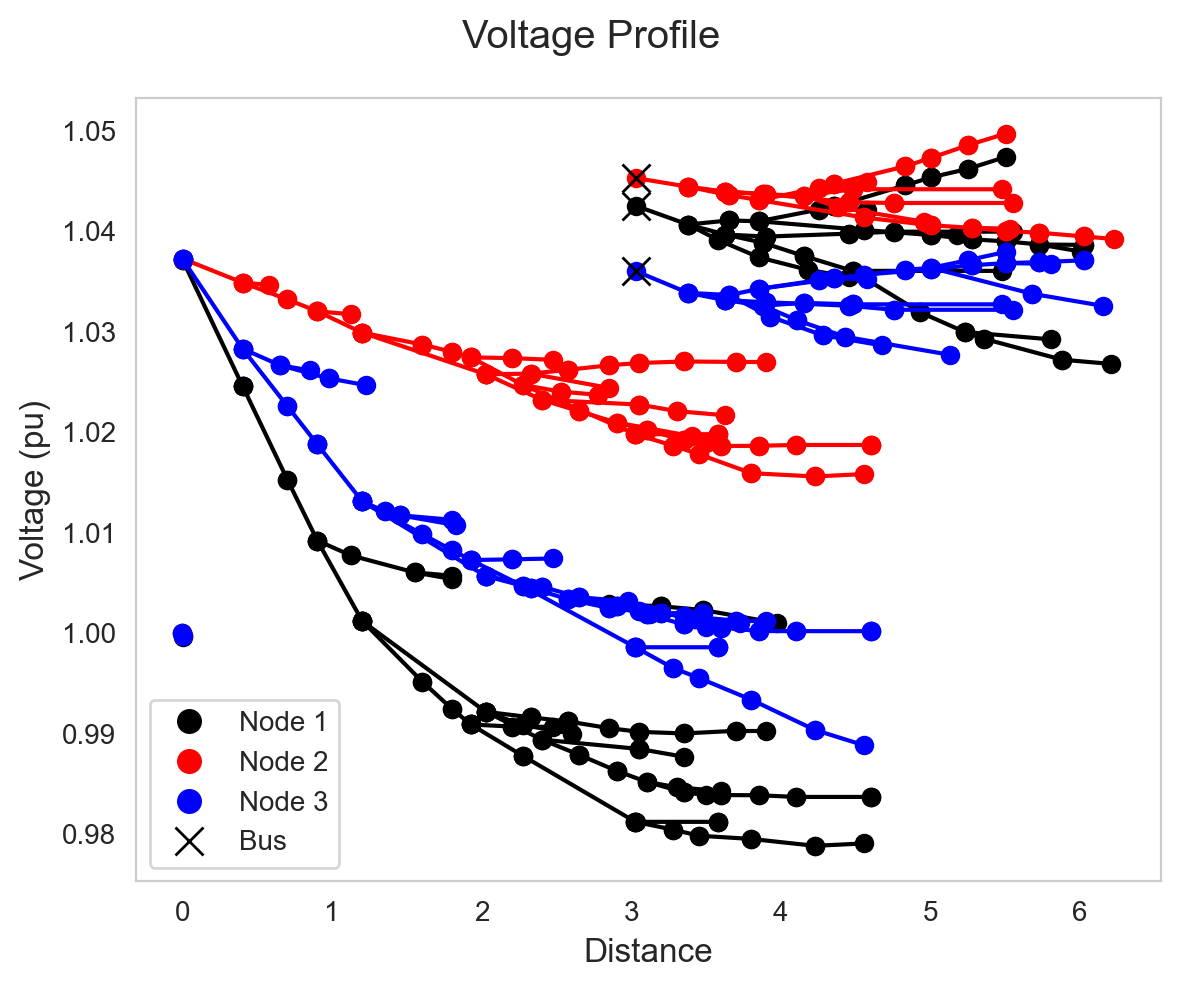

In [20]:
buses_marker = [dss_tools.static_view.voltage_profile_get_bus_marker("160r", marker_name="Bus", show_legend=True)]
dss_tools.static_view.voltage_profile_plot_style.legend_loc = "best"
dss_tools.static_view.voltage_profile(buses_marker=buses_marker)

### Conclusion

In this notebook, we demonstrated how to visualize the static option of the voltage profile of a distribution feeder using the `py_dss_tools` package. We covered the process of compiling a DSS model, adding an energymeter, solving a snapshot simulation, and generating various voltage profile plots. The `py_dss_tools` package provides flexibility in customizing the plots, allowing users to adjust titles, annotate specific buses, and modify Matplotlib attributes to suit their needs.
